In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [15]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

In [16]:
def drawSV(X,y,X_n,X_p,f,reg,w,icpt,mini,maxi,i,sup_vec):    
    plt.subplot(4,len(reg),f)
    plt.scatter(X_n[:,0],X_n[:,1],color='red',label=reg[b])
    plt.scatter(X_p[:,0],X_p[:,1],color='green',label=reg[b])
    draw_line(w[0],icpt,mini,maxi)
    plt.title("Hyperparameter C="+str(reg[b])+str(i))         
    plt.xlabel('X1')
    plt.ylabel('X2')
    ax = plt.gca()
    lim_x = ax.get_xlim() # x-axis limits in data coordinates.
    lim_y=ax.get_ylim() # y-axis limits in data coordinates.
##https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85
    axx = np.linspace(lim_x[0], lim_x[1])
    #x.min(),y.max()
    ayy = np.linspace(lim_y[0], lim_y[1])
    #y.min(), y.max()
    ZY, ZX = np.meshgrid(ayy, axx)
    xy = np.vstack([ZX.ravel(), ZY.ravel()]).T
    Z = Svc.decision_function(xy).reshape(ZX.shape)
##https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
    ax.contour(ZX, ZY, Z, colors='g', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
        
    plt.scatter(sup_vec[:,0],sup_vec[:,1],s=50,color="blue",label='support vectors')
        

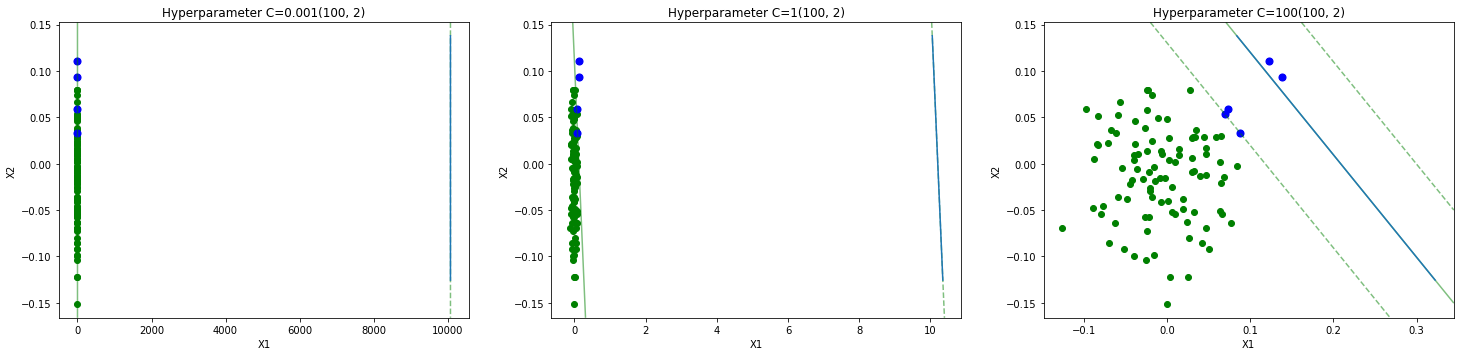

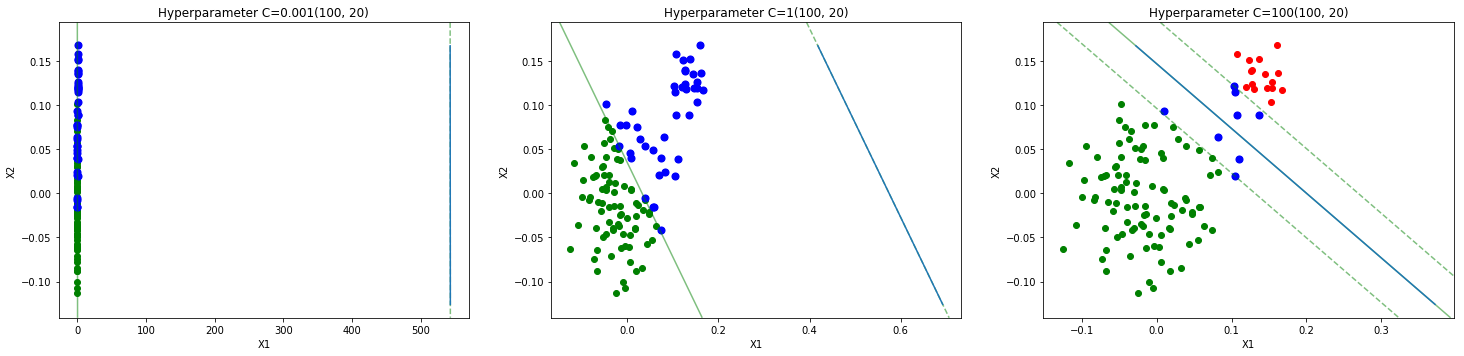

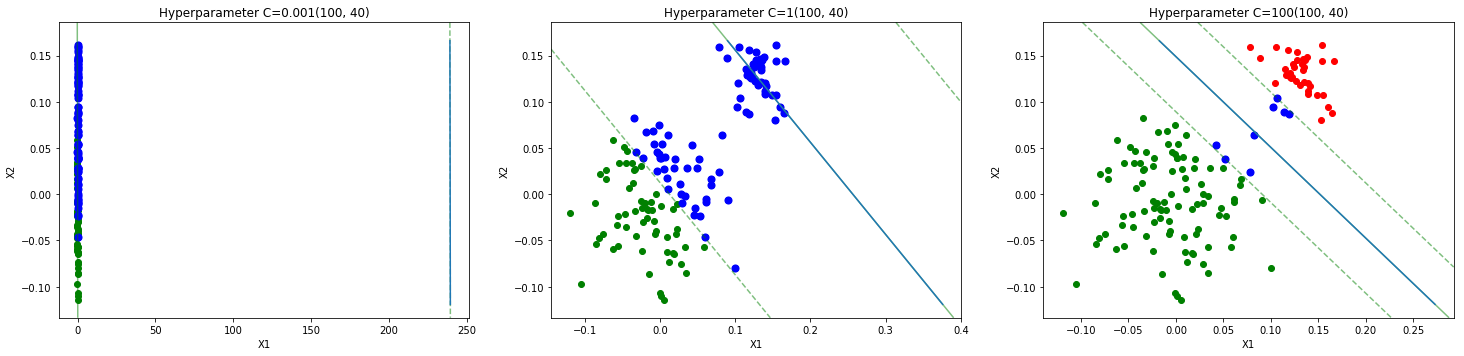

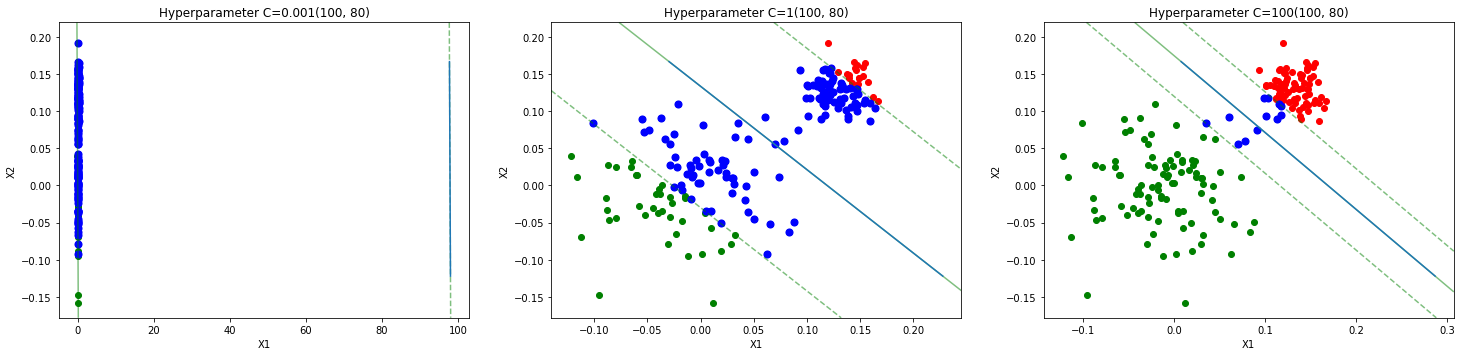

In [17]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
reg= [0.001, 1, 100]
k=0
for q,i in enumerate(ratios):
    plt.figure(figsize=(25,25))
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for b in range(len(reg)):
        Svc=SVC(kernel="linear",C=reg[b],random_state=42)
        Svc.fit(X,y)
        minu,maxi=  X[:,0].min() , X[:,0].max() 
        w ,icpt , sup_vec =Svc.coef_ ,Svc.intercept_ ,Svc.support_vectors_
        k=k+1
        line_SV = drawSV(X,y,X_n,X_p,k,reg,w,icpt,minu,maxi,i,sup_vec)        
        

C=0.001 

We could not able to find decision boundry, the model was underfitted.

C=1

Ratio(100,2) the model is underfitted, there are a lot of support vectors.

Ratio(100,20) the model is underfitted there is more SV than the datapoints.

Ratio(100,40) the model is similar to previous plot.

Ratio(100,80) the model is highly underfited.

C=100

Ratio(100,2) the model is underfitted, there are some support vectors.

Ratio(100,20) the model is fitted well.

Ratio(100,40) the model is slightly overfitted.

Ratio(100,80) the model is fitted properly.

C is a hyper parameter which is inverse of regularization strength.

As C increases the marginal distance between the margin decreases.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [18]:
def draw(X_n,X_p,f,reg,w,icpt,mini,maxi,i):
    plt.subplot(4,len(reg),f)
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
    plt.scatter(X_p[:,0],X_p[:,1],color='green')
    draw_line(w[0],icpt,mini,maxi)
    plt.title("Hyperparameter C="+str(reg[b])+str(i))  
    plt.xlabel('X1')
    plt.ylabel('X2')

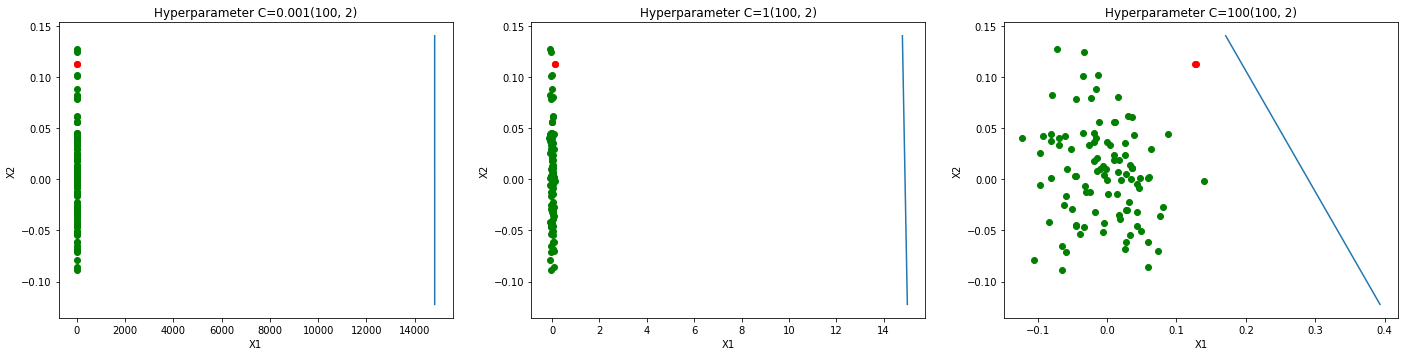

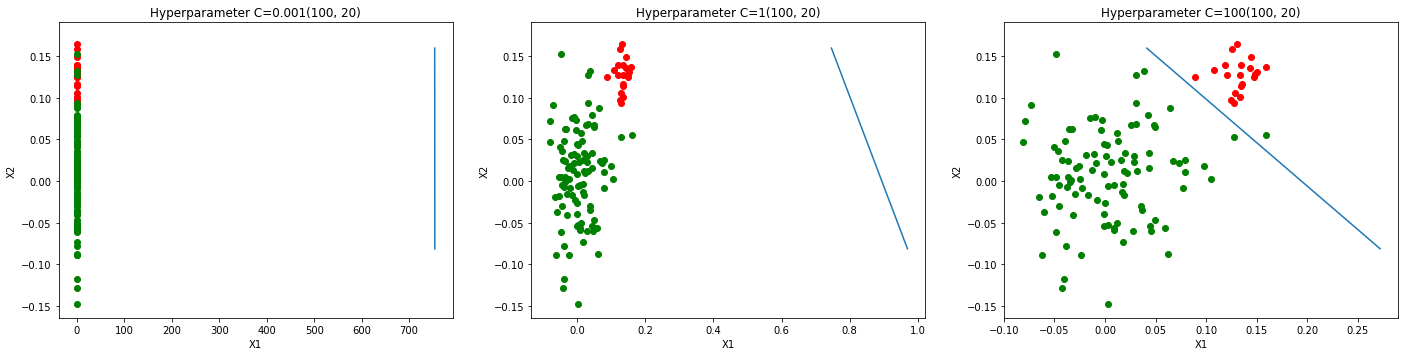

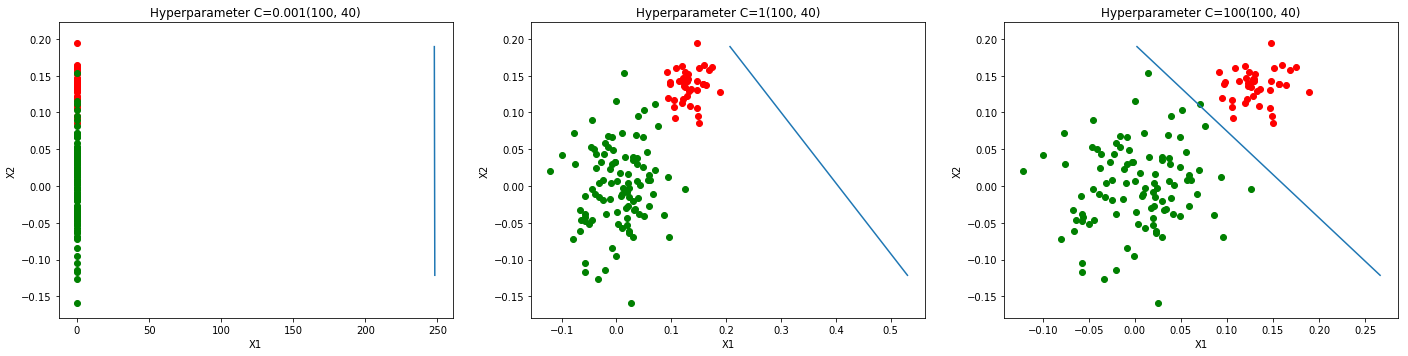

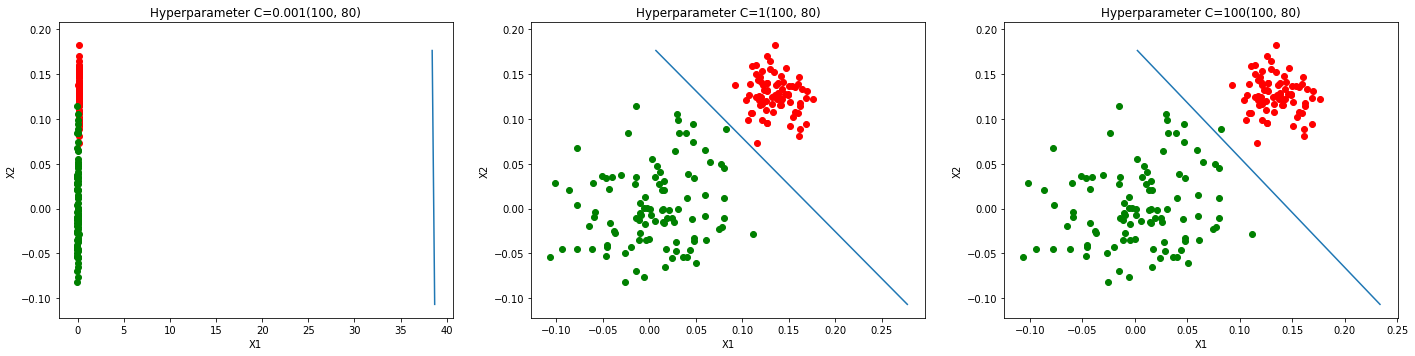

In [20]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
reg= [0.001, 1, 100]
l=0
for idx,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))    
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.figure(figsize=(24,25))
    for b in range(3):
        Lr=LogisticRegression(C=reg[b],random_state=42)
        Lr.fit(X,y)
        minu,maxi=X[:,0].min() , X[:,0].max()
        w ,icpt =Lr.coef_ ,Lr.intercept_
        l=l+1
        line=draw(X_n,X_p,l,reg,w,icpt,minu,maxi,i)
        

when C=0.001 the decision boundary is not formed properly.

C = 1

for Ratio(100:2) and Ratio(100:20) model is highly underfited.

for Dataset 3 (100:40) model is slightly underfited

for Dataset 4 (100:80) model is fitted well

C=100

for Ratio(100:2) model is underfitted.

for Ratio(100:20) model is slightly underfitted , because of imbalance in class.

for Ratio(100:40) model is slightly overfitted.

for Ratio(100:80) model is fitted in a decent way.


c is inverse of regularization strength.

when C is less there is high tendency of underfitting the data

when C is large there is a tendency of overfitting the data.

when C=100 we can see the decision boundary clearly separates the positive and the negative points.



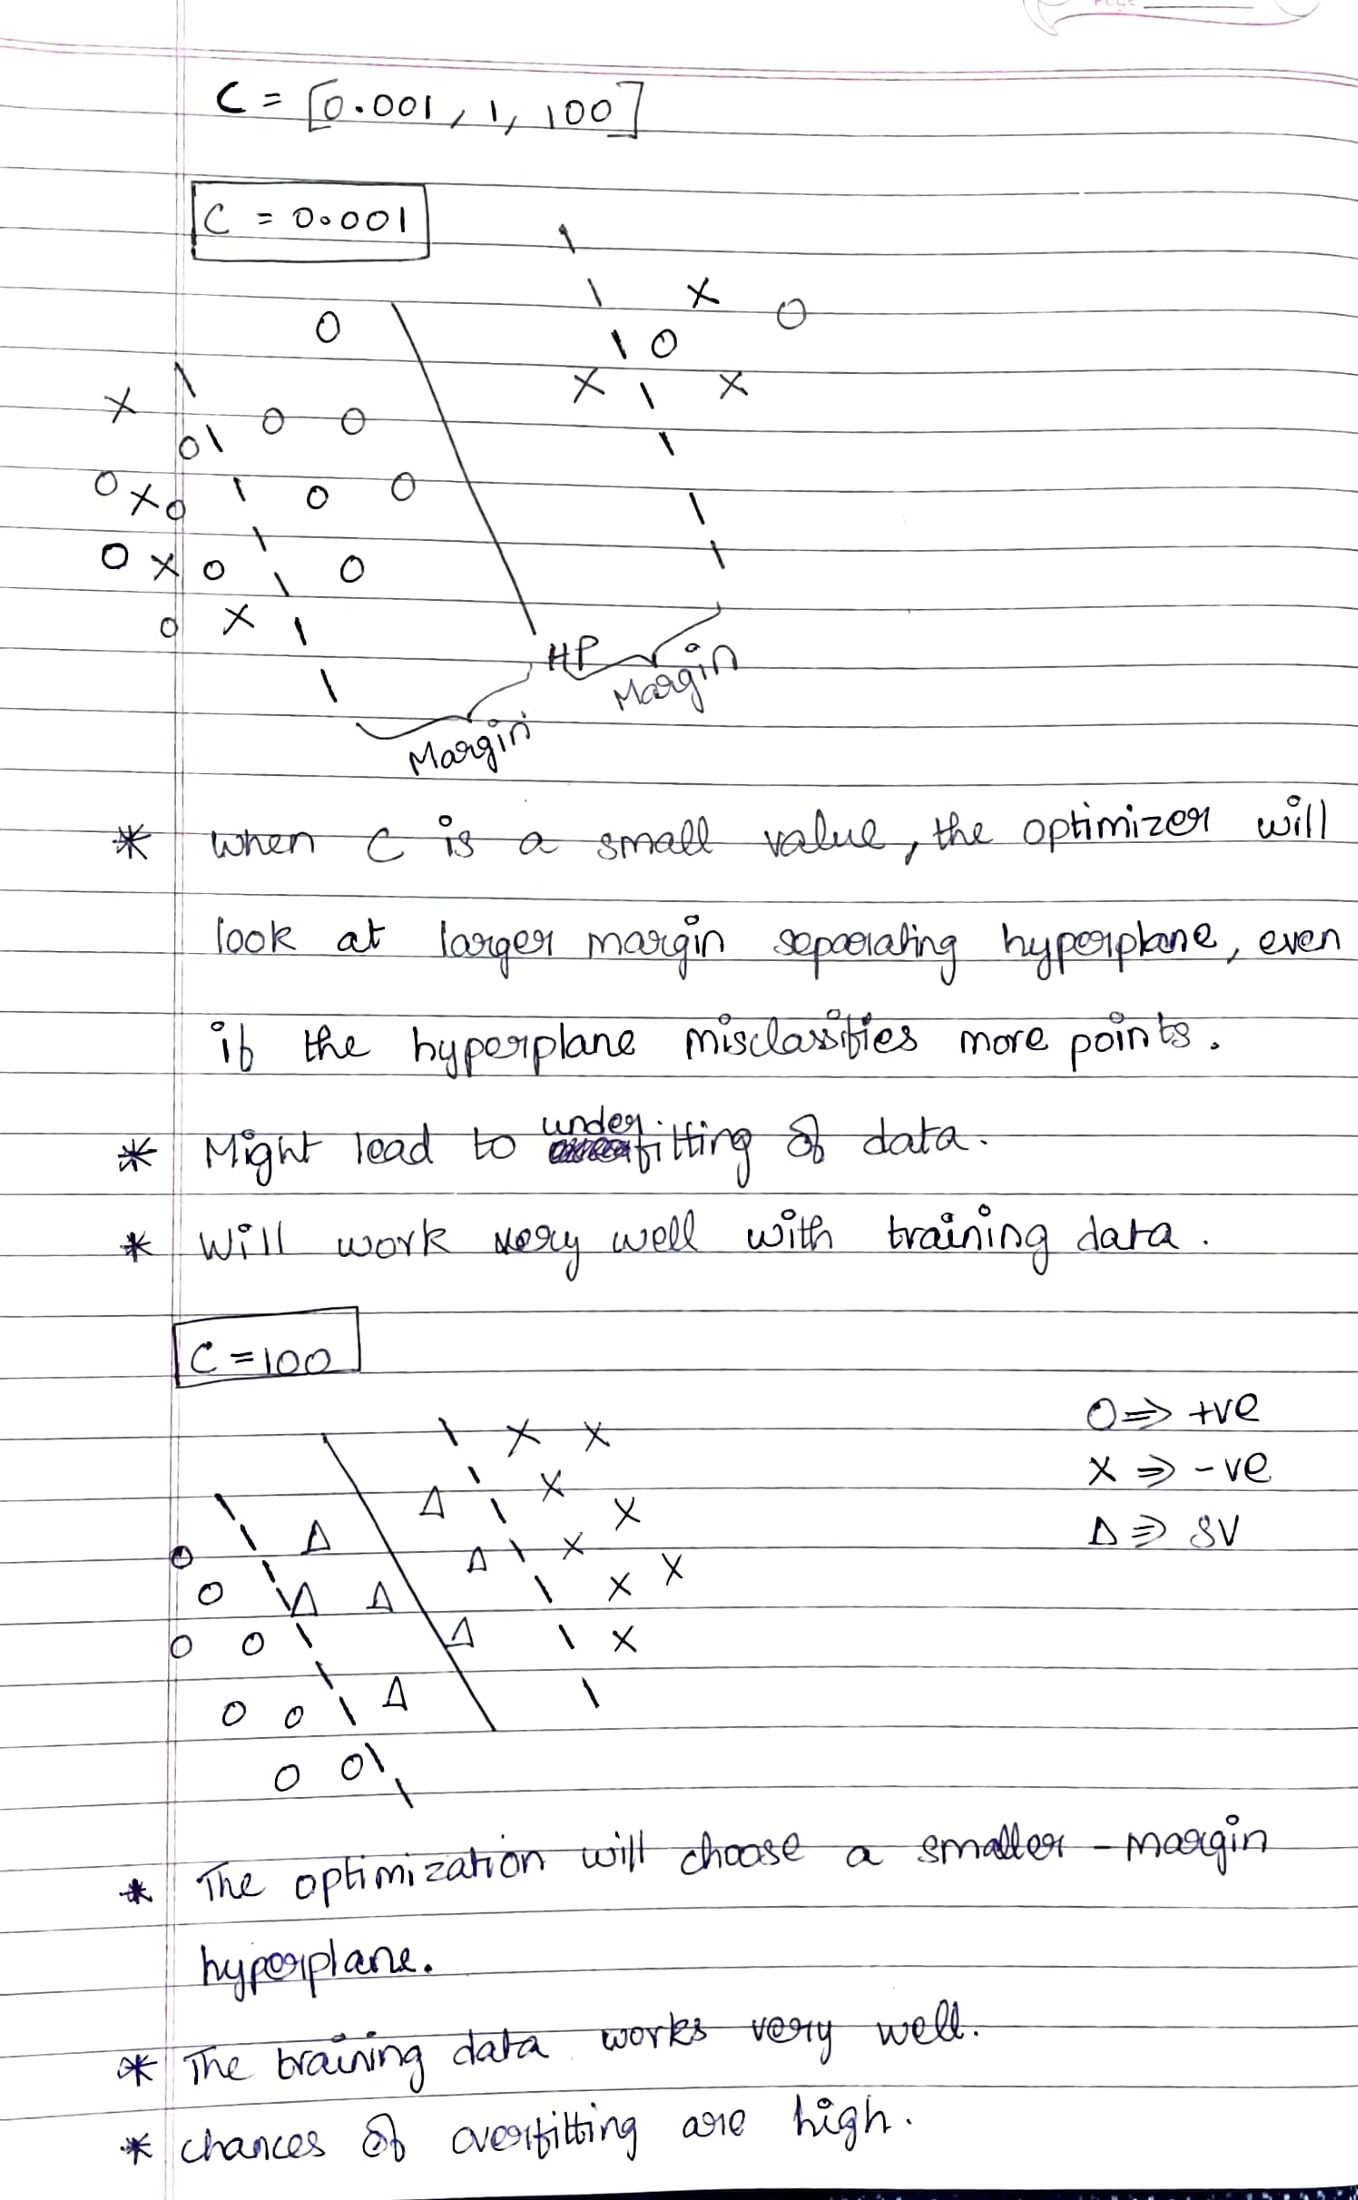